<a href="https://colab.research.google.com/github/podtyazhki1337/cv/blob/main/Young's_modulus_for_testing_machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
NumPy version: 1.22.4
Pandas version: 1.5.3


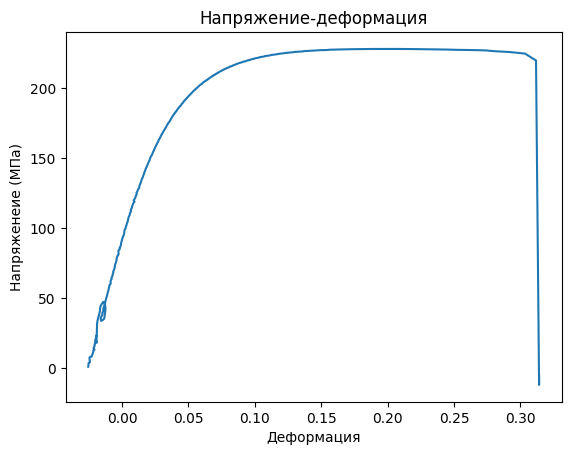

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


print("NumPy version:",np.__version__)
print("Pandas version:",pd.__version__)

test_data = pd.read_excel('/content/16012023_2_45_3.lia.xlsx')

test_data.head()
### параметры образца#####
diam = 2.03 # mm
a = 5   # mm
b = 5.61  # mm

l = 12  # mm Длина рабочей зоны
##########################
# прописать выбор геометрии чечения
area_type = 'b' # r круглое сечение, b - прямоугольное

if area_type == 'r':
    area = np.pi*(diam/2)**2
else:
    area = a*b

stress = test_data['C_1_Нагрузка[kN]']*1000/area
strain = test_data['C_1_VEX lateral[mm]']/ l



##### Модуль Упругости ######
i = 0
E_ss = [[],[]]
while i < len(strain)-1:
    if 170 < stress[i] < 400: # Нужно сделать диапазон контролируемым
        E_ss[0].append(strain[i])
        E_ss[1].append(stress[i])
    i+=1
#rint(len(E_ss[0]))
j = len(E_ss[0]) - 1
E = (E_ss[1][j]-E_ss[1][0])/(E_ss[0][j]-E_ss[0][0])

#print(E, (E_ss[1][j]/E_ss[0][j]), E_ss[1][j], E_ss[0][j])
###########удлинение при разрыве###############
b = stress[len(stress)-1] - E*strain[len(strain)-1]

e_0 = -b/E*100
###########предел прочности###############

Sigma_max = np.max(np.array(stress))

###########предел текучести сигми 0.2 ###############

b_02 = -E*0.002
Sigma_02 = []
Eps_02 = []
for x in strain:
    if x >= 0.002:
        Sigma_02.append(E*x+b_02)
        Eps_02.append(x)
"""
for x in Sigma_02:
    if x
"""

###### Функция нахождения наименьшей разницы двух параметров ##########
"""
i = 0
j = 0
Sigma_02final = 0
Eps_02final = 0
delta = 1
while i < (len(Sigma_02)):
  while j < (len(stress)):
    d = (Sigma_02[i] - stress[j])**2 + (Eps_02[i]*1000 - strain[j]*1000)**2
    j += 1
    if d <= delta:
      Sigma_02final = stress[j]
      Eps_02final = strain[j]
      delta = d
  i += 1
  j = 0

"""

#print(len(stress), len(Sigma_02))
#график напряжение-деформация#
plt.plot(strain, stress)
plt.xlabel('Деформация')
plt.ylabel('Напряжение (МПа)')
plt.title('Напряжение-деформация')
plt.show()
##############################

In [ ]:
print(Sigma_02final, Eps_02final, d, delta, i, j)

552.0828848151743 0.006009128689765932 1121064.7005869935 3.735943297023717e-06 402 0


In [ ]:
Sigma_max

1290.3340657552085

In [ ]:
print(stress)

0        5.461385
1        5.669328
2        6.266466
3        6.907397
4        7.686299
          ...    
582    868.446561
583    868.036029
584    867.186015
585    865.418951
586    858.024584
Name: C_1_Нагрузка[kN], Length: 587, dtype: float64
